In [13]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import matplotlib.pyplot as plt

num_qubits = 3


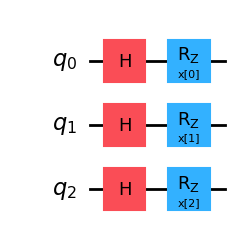

In [14]:
def local_z_feature_map(n_qubits: int) -> QuantumCircuit:
    x = ParameterVector('x', n_qubits)  # features x_0, x_1, ...
    qc = QuantumCircuit(n_qubits)

    # Put qubits in superposition
    for q in range(n_qubits):
        qc.h(q)

    # Encode each feature with a Z rotation
    for q in range(n_qubits):
        qc.rz(x[q], q)

    return qc

qc_local = local_z_feature_map(num_qubits)
qc_local.draw(output='mpl')


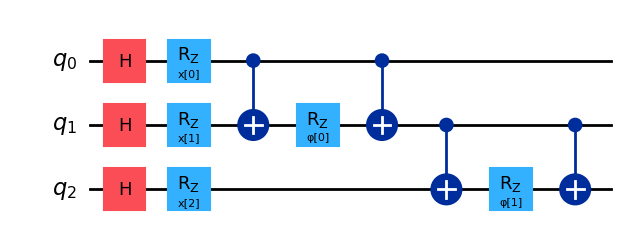

In [15]:
def zz_interaction_feature_map(n_qubits: int) -> QuantumCircuit:
    x = ParameterVector('x', n_qubits)      # single-qubit terms
    phi = ParameterVector('φ', n_qubits-1)  # interaction terms

    qc = QuantumCircuit(n_qubits)

    # Superposition
    for q in range(n_qubits):
        qc.h(q)

    # Local Z rotations
    for q in range(n_qubits):
        qc.rz(x[q], q)

    # ZZ interactions between neighbours
    for q in range(n_qubits - 1):
        qc.cx(q, q+1)
        qc.rz(phi[q], q+1)
        qc.cx(q, q+1)

    return qc

qc_zz = zz_interaction_feature_map(num_qubits)
qc_zz.draw(output='mpl')


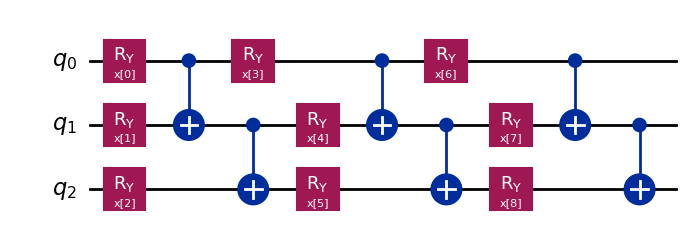

In [16]:
def data_reuploading_feature_map(n_qubits: int, reps: int = 2) -> QuantumCircuit:
    x = ParameterVector('x', n_qubits * reps)  # new features each layer
    qc = QuantumCircuit(n_qubits)

    idx = 0
    for r in range(reps):
        # Encode features in this layer with RY
        for q in range(n_qubits):
            qc.ry(x[idx], q)
            idx += 1

        # Entangle neighbours with CX
        for q in range(n_qubits - 1):
            qc.cx(q, q+1)

    return qc

qc_reupload = data_reuploading_feature_map(num_qubits, reps=3)
qc_reupload.draw(output='mpl')


In [17]:
fig1 = qc_local.draw(output='mpl')
fig1.savefig("feature_local_z.png", dpi=300, bbox_inches='tight')
plt.close(fig1)

fig2 = qc_zz.draw(output='mpl')
fig2.savefig("feature_zz_interaction.png", dpi=300, bbox_inches='tight')
plt.close(fig2)

fig3 = qc_reupload.draw(output='mpl')
fig3.savefig("feature_reuploading.png", dpi=300, bbox_inches='tight')
plt.close(fig3)
